# K-means

---

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

df = pd.DataFrame([X[:,0], X[:,1], y]).T
df.columns = ["x1", "x2", "label"]
df["label"] = df["label"].astype(int)
df.head()

,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2


<Axes: xlabel='x1', ylabel='x2'>

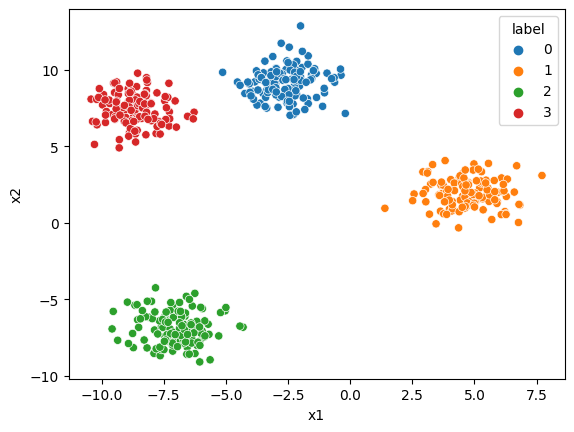

In [9]:
sns.scatterplot(data= df, x= "x1", y= "x2", hue="label", palette="tab10")

In [10]:
X = df.drop("label", axis= 1)
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


## Feature scaling 

---

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

<Axes: >

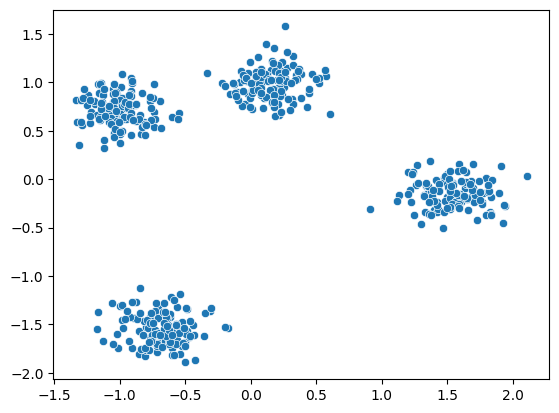

In [15]:
sns.scatterplot(x= scaled_X[:, 0], y= scaled_X[:, 1])

## K-means 

---

In [17]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_squared_distance = [KMeans(k, n_init="auto").fit(scaled_X).inertia_ for k in clusters]

sum_squared_distance


[999.9999999999993,
 522.1570539287738,
 116.09567852755526,
 28.78693897887401,
 25.662188235339578,
 23.47032102504029,
 22.116684949654974,
 18.942208484438453,
 17.842888416223783]

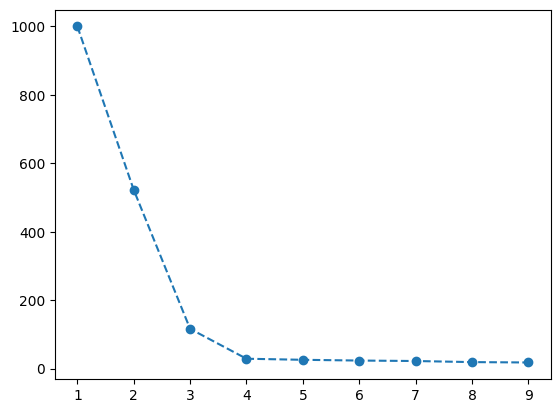

In [18]:
plt.plot(clusters, sum_squared_distance, "--o")

In [19]:
pd.Series(sum_squared_distance).diff()[1:]

1   -477.842946
2   -406.061375
3    -87.308740
4     -3.124751
5     -2.191867
6     -1.353636
7     -3.174476
8     -1.099320
dtype: float64

## Silhouette

---

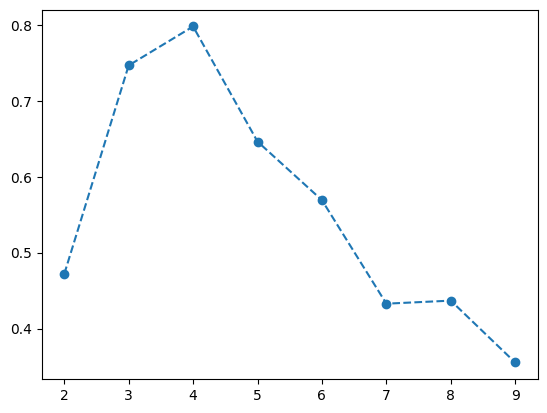

In [22]:
from sklearn.metrics import silhouette_score

kmeans = [KMeans(k, n_init = "auto").fit(scaled_X) for k in clusters]
silhouette_scores = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]

plt.plot(clusters[1:], silhouette_scores, "--o")

## Visualization

---

In [26]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])
df_plot.head()

,x1,x2
0,-0.815393,0.589390
1,-1.173444,-1.553288
2,1.938811,-0.272989
3,0.092842,0.736467
4,-0.433975,-1.609212


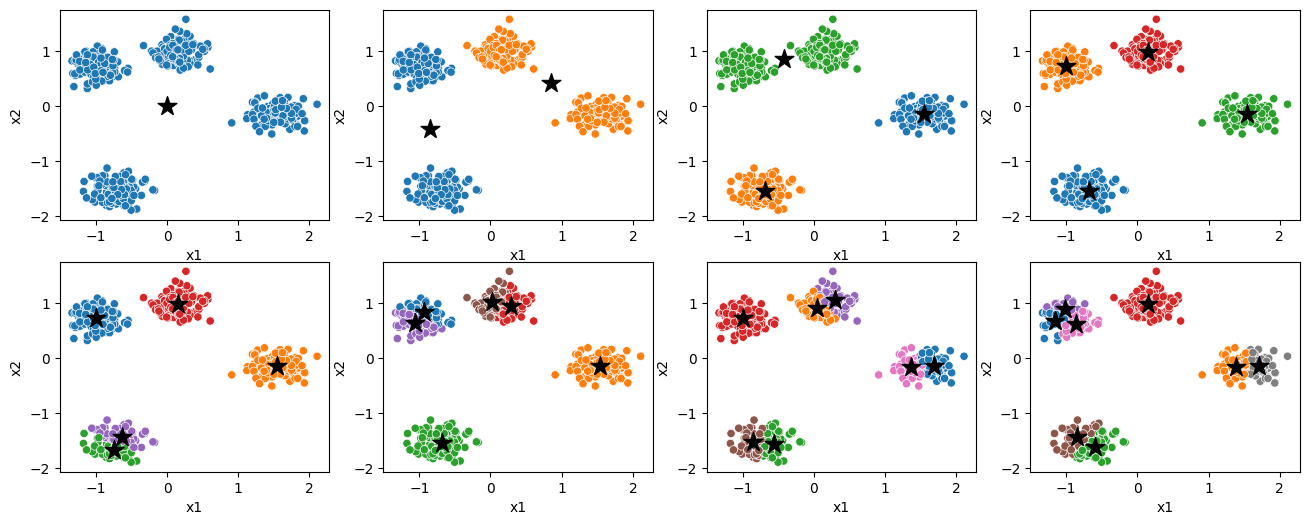

In [27]:
fig, axes = plt.subplots(2, 4, figsize=(16, 6))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data= df_plot, x="x1", y="x2", hue="label", palette="tab10", ax= ax)
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1], s = 200, marker= "*", color="black")

    ax.legend([], [], frameon= False)

In [28]:
kmeans[1].cluster_centers_

array([[-0.84426505, -0.41357745],
       [ 0.84426505,  0.41357745]])